In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.pipeline import Pipeline
from timeit import default_timer as timer
import math
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from project import plt_ant_feat

In [2]:
data_train = pd.read_csv('data/R17_global_train.csv')
X_train = data_train.drop(['lon', 'lat', 'GHF'], axis=1)
y_train = data_train[['GHF']].values.ravel()

labels = X_train.columns.values
num_features = len(labels)

data_test = pd.read_csv('data/R17_global_test.csv')
X_test = data_test.drop(['lon', 'lat', 'GHF'], axis=1)
y_test = data_test[['GHF']].values.ravel()

# Scale X
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Num Features:', num_features)
print(labels)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

Num Features: 17
['thickness_upper_crust' 'thickness_middle_crust'
 'upper_mantle_density_anomaly' 'd_2_ridge' 'd_2_trench' 'd_2_trans_ridge'
 'd_2_volcano' 'd_2_hotspot' 'thickness_crust' 'd_2_young_rift'
 'upper_mantle_vel_structure' 'age' 'magnetic_anomaly' 'depth_to_moho'
 'lithos_asthenos_bdry' 'bougeur_gravity_anomaly' 'topography']
X_train shape: (3227, 17)
y_train shape: (3227,)
X_test shape: (807, 17)
y_test shape: (807,)


In [10]:
feature_idx = [4, 5, 6, 7, 9, 11]
X_train_selected = X_train.take(feature_idx, axis=1)
X_test_selected = X_test.take(feature_idx, axis=1)

knn = KNeighborsRegressor(algorithm='auto',
                          metric='manhattan',
                          n_neighbors=3,
                          weights='distance')

knn.fit(X_train_selected, y_train)
print('R^2:', knn.score(X_test_selected, y_test))
pred = knn.predict(X_test_selected)
rmse = (1 / np.average(y_test)) * math.sqrt(np.average((y_test - pred)**2))
print ('RMSE:', rmse)

R^2: 0.7956820912556781
RMSE: 0.14093845390877527


(10800, 17)


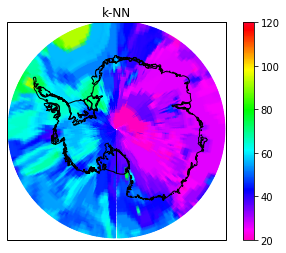

In [11]:
ant_data = pd.read_csv('data/ant_features.csv')
X_ant = ant_data.drop(['lon', 'lat'], axis=1)
X_ant = scaler.transform(X_ant)
X_ant_selected = X_ant.take(feature_idx, axis=1)
print(X_ant.shape)

ant_pred = knn.predict(X_ant_selected)
plt_ant_feat(ant_pred, title='k-NN', hide_water=False)